## 共通処理

In [12]:
# 必要なパッケージをインポート
# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)


In [13]:
import pymc as pm
import arviz as az

## ch4

この問題設定において、
  - 最尤推定は、二項分布からpを求めることを採用している(おそらく尤度関数がたてられるから)  
  - ベイズ推論は、ベルヌーイ分布からpを求めることを採用(得られているデータに対応する様に。一般化線形モデルの誤差構造とイメージ近い？)しており、さらにベルヌーイ分布のパラメータp(この問題で求めたいもの)の出どころ(事前分布)を一様分布としている(さらに言えばこの一様分布のパラメータである上限,下限は自分で主観的に決められる)。

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


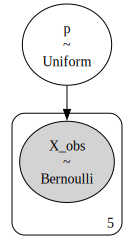

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.434,0.177,0.123,0.761,0.006,0.004,873.000,1315.000,1.000


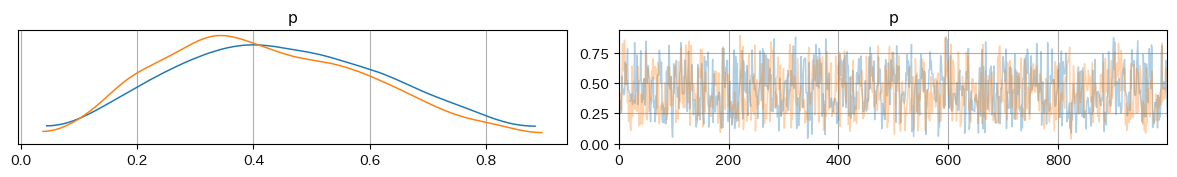

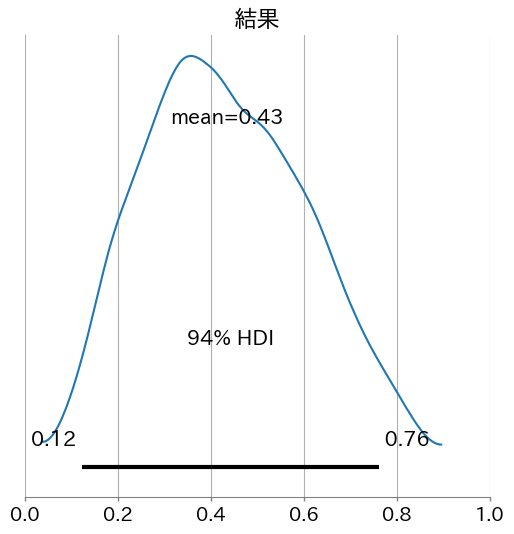

In [14]:
# データ準備
X = np.array([1, 0, 0, 1, 0])

# コンテキスト定義
model = pm.Model()

with model:
    # 一様分布
    p = pm.Uniform("p", lower = 0.0, upper = 1.0)

    # ベルヌーイ分布
    X_obs = pm.Bernoulli("X_obs", p = p, observed = X)

    idata1_1 = pm.sample(
        chains = 2,
        tune = 1000,
        draws = 1000,
        random_seed = 42
    )

# 確率モデルの可視化
g = pm.model_to_graphviz(model)
display(g)


az.plot_trace(idata1_1, compact = False)
plt.tight_layout()

ax = az.plot_posterior(idata1_1)
ax.set_xlim(0, 1)
ax.set_title("結果")

display(az.summary(idata1_1))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


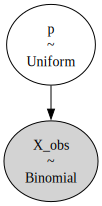

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.434,0.177,0.123,0.761,0.006,0.004,873.000,1315.000,1.000


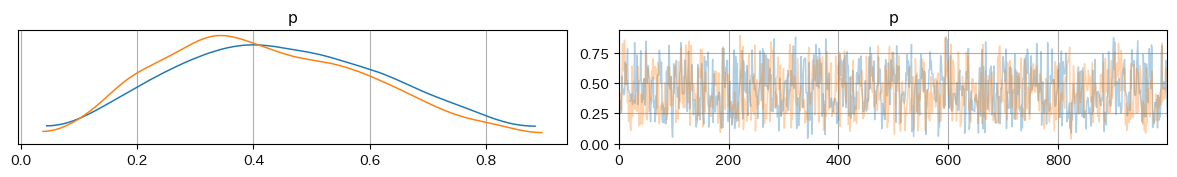

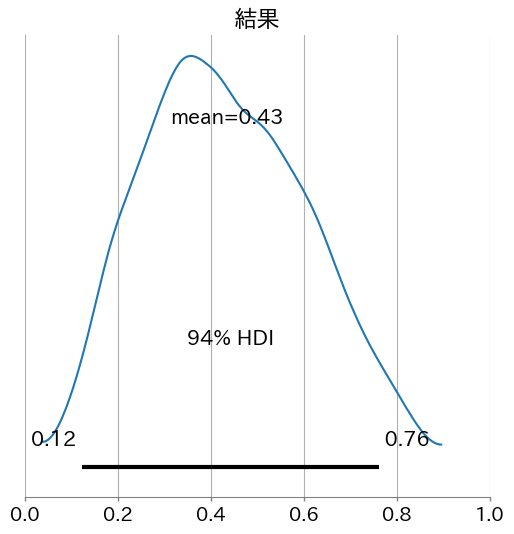

In [15]:
# 確率モデルを二項分布に変更
# コンテキスト定義
model2 = pm.Model()

with model2:
    # 一様分布
    p = pm.Uniform("p", lower = 0.0, upper = 1.0)

    # 二項分布
    X_obs = pm.Binomial("X_obs", p = p, n = 5, observed = 2)

    idata1_2 = pm.sample(
        chains = 2,
        tune = 1000,
        draws = 1000,
        random_seed = 42
    )

# 確率モデルの可視化
g = pm.model_to_graphviz(model2)
display(g)


az.plot_trace(idata1_2, compact = False)
plt.tight_layout()

ax = az.plot_posterior(idata1_2)
ax.set_xlim(0, 1)
ax.set_title("結果")

display(az.summary(idata1_2))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


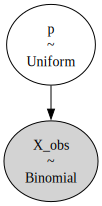

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.435,0.169,0.108,0.714,0.006,0.004,719.000,669.000,1.000


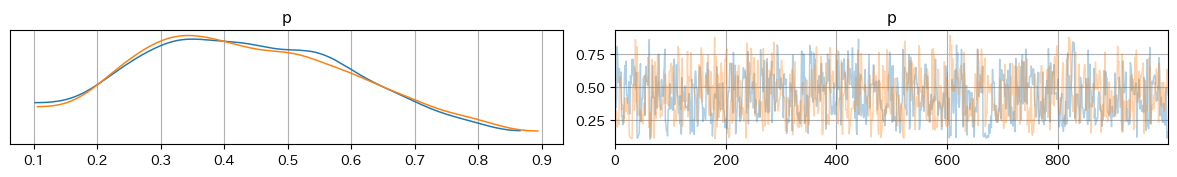

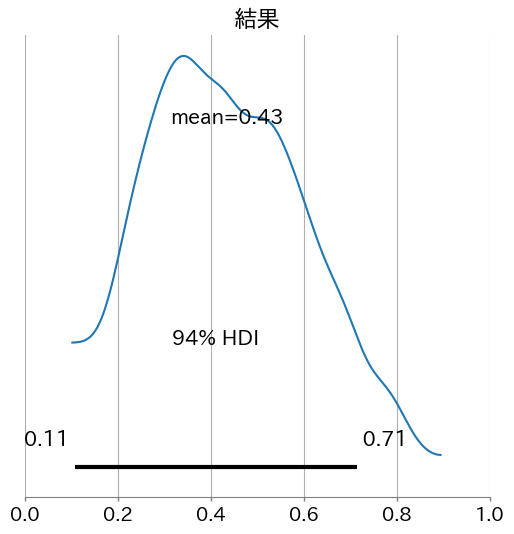

In [16]:
# 事前分布を変更
# コンテキスト定義
model3 = pm.Model()

with model3:
    # 一様分布
    p = pm.Uniform("p", lower = 0.1, upper = 0.9)

    # 二項分布
    X_obs = pm.Binomial("X_obs", p = p, n = 5, observed = 2)

    idata1_3 = pm.sample(
        chains = 2,
        tune = 1000,
        draws = 1000,
        random_seed = 42
    )

# 確率モデルの可視化
g = pm.model_to_graphviz(model3)
display(g)


az.plot_trace(idata1_3, compact = False)
plt.tight_layout()

ax = az.plot_posterior(idata1_3)
ax.set_xlim(0, 1)
ax.set_title("結果")

display(az.summary(idata1_3))